In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2
from psycopg2 import Error

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Создание подключения к базе данных sql_case_bi_mgpu (база, с которой можно создавать другие базы)
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database="postgres")
    connection.autocommit = True  # Отключаем транзакцию для команды CREATE DATABASE
    cursor = connection.cursor()

    # Создание базы данных
    cursor.execute("CREATE DATABASE medical_db;")
    print("База данных 'medical_db' успешно создана")

    # Закрытие текущего соединения для подключения к новой базе данных
    close_connection(connection)

    # Подключение к новой базе данных 'medical_db'
    connection = get_connection("medical_db")
    cursor = connection.cursor()

    # Создание таблицы Hospital
    create_table_query = '''
    CREATE TABLE Hospital (
        Hospital_Id serial NOT NULL PRIMARY KEY,
        Hospital_Name VARCHAR (100) NOT NULL,
        Bed_Count serial
    );
    '''
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица 'Hospital' успешно создана")

    # Вставка данных в таблицу Hospital
    insert_query = '''
    INSERT INTO Hospital (Hospital_Id, Hospital_Name, Bed_Count)
    VALUES
    (1, 'Mayo Clinic', 200),
    (2, 'Cleveland Clinic', 400),
    (3, 'Johns Hopkins', 1000),
    (4, 'UCLA Medical Center', 1500);
    '''
    cursor.execute(insert_query)
    connection.commit()
    print("Данные успешно вставлены в таблицу 'Hospital'")

except (Exception, psycopg2.Error) as error:
    print("Ошибка при подключении или работе с PostgreSQL:", error)

finally:
    # Закрытие подключения к базе данных
    if connection:
        close_connection(connection)

In [ ]:
CREATE TABLE Doctor (
    Doctor_Id serial NOT NULL PRIMARY KEY,
    Doctor_Name VARCHAR (100) NOT NULL,
    Hospital_Id serial NOT NULL,
    Joining_Date DATE NOT NULL,
    Speciality VARCHAR (100) NOT NULL,
    Salary INTEGER NOT NULL,
    Experience SMALLINT
);

-- Вставка данных о докторах
INSERT INTO Doctor (Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience)
VALUES
('101', 'David', '1', '2005-02-10', 'Pediatric', 40000, NULL),
('102', 'Michael', '1', '2018-07-23', 'Oncologist', 20000, NULL),
('103', 'Susan', '2', '2016-05-19', 'Garnacologist', 25000, NULL),
('104', 'Robert', '2', '2017-12-28', 'Pediatric', 28000, NULL),
('105', 'Linda', '3', '2004-06-04', 'Garnacologist', 42000, NULL),
('106', 'William', '3', '2012-09-11', 'Dermatologist', 30000, NULL),
('107', 'Richard', '4', '2014-08-21', 'Garnacologist', 32000, NULL),
('108', 'Karen', '4', '2011-10-17', 'Radiologist', 30000, NULL),
('109', 'James', '1', '2022-01-15', 'Cardiologist', 45000, 5),
('110', 'Emily', '1', '2023-04-10', 'Orthopedic Surgeon', 50000, 3),
('111', 'Olivia', '2', '2021-09-05', 'Neurologist', 42000, 4),
('112', 'John', '2', '2024-02-18', 'Surgeon', 60000, 2),
('113', 'Sophia', '3', '2022-07-30', 'Urologist', 38000, 6),
('114', 'Daniel', '3', '2025-03-22', 'Pulmonologist', 47000, 1),
('115', 'Isabella', '4', '2023-11-01', 'Pediatrician', 41000, 3),
('116', 'Liam', '4', '2022-05-25', 'Dermatologist', 35000, 4),
('117', 'Mia', '1', '2024-06-17', 'Gastroenterologist', 53000, 2),
('118', 'Lucas', '2', '2023-01-12', 'Anesthesiologist', 46000, 3);

## **Задание 1** Создайте таблицу "Patient" с полями "ID", "NAME", "AGE", "DIAGNOSIS".

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных
    database_name = 'medical_db'
    connection = get_connection(database_name)
    cursor = connection.cursor()
    
    # SQL-запрос для создания новой таблицы
    create_table_query = '''CREATE TABLE patient
          (id INT PRIMARY KEY NOT NULL,
          name VARCHAR(100) NOT NULL,
          age INT,
          diagnosis VARCHAR(100)
          ); '''
    # Выполнение команды: создание новой таблицы
    cursor.execute(create_table_query)
    connection.commit()
    print("Таблица успешно создана в PostgreSQL")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if connection:
        close_connection(connection)

Таблица успешно создана в PostgreSQL
Соединение с PostgreSQL закрыто


## **Задание 2**  Вставьте 14 записей о пациентах


In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

try:
    # Подключение к базе данных
    database_name = 'medical_db'
    connection = get_connection(database_name)
    cursor = connection.cursor()

    insert_query = '''INSERT INTO Patient (ID, NAME, AGE, DIAGNOSIS) VALUES
 (1, 'Иванов Иван Иванович', 45, 'Гипертоническая болезнь'),
 (2, 'Петрова Мария Сергеевна', 32, 'Сахарный диабет 2 типа'),
 (3, 'Сидоров Алексей Владимирович', 28, 'Острый бронхит'),
 (4, 'Кузнецова Елена Дмитриевна', 56, 'Остеоартроз коленных суставов'),
 (5, 'Смирнов Дмитрий Петрович', 61, 'ИБС: Стенокардия напряжения'),
 (6, 'Федорова Анна Михайловна', 24, 'Атопический дерматит'),
 (7, 'Николаев Артем Игоревич', 19, 'Острый гастрит'),
 (8, 'Павлова Ольга Александровна', 42, 'Хронический пиелонефрит'),
 (9, 'Волков Сергей Николаевич', 37, 'Язвенная болезнь желудка'),
 (10, 'Козлова Ирина Викторовна', 29, 'Бронхиальная астма'),
 (11, 'Лебедев Михаил Олегович', 53, 'ХОБЛ'),
 (12, 'Соколова Наталья Валерьевна', 48, 'Желчнокаменная болезнь'),
 (13, 'Орлов Андрей Сергеевич', 65, 'Артериальная гипертензия'),
 (14, 'Антонова Юлия Дмитриевна', 31, 'Хронический тонзиллит'); '''
    cursor.execute(insert_query)
    connection.commit()
    print("Пациенты успешно добавлены в таблицу")

except (Exception, Error) as error:
    print("Ошибка при подключении к PostgreSQL:", error)
finally:
    if connection:
        close_connection(connection)


Пациенты успешно добавлены в таблицу
Соединение с PostgreSQL закрыто


## **Задание 3** Обновите стаж врача с ID=110 на 4 года.

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

def update_experience(doctor_id, new_experience):
    try:
        # Подключаемся к базе данных
        database_name = 'medical_db'
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # Обновляем стаж доктора с указанным ID
        update_query = """UPDATE Doctor SET Experience = %s WHERE Doctor_Id = %s"""
        cursor.execute(update_query, (new_experience, doctor_id))
        connection.commit()

        print(f"Стаж врача с ID {doctor_id} успешно обновлен на {new_experience} лет")

        # Печать данных о докторе после обновления
        select_query = """SELECT Doctor_Id, Doctor_Name, Hospital_Id, Joining_Date, Speciality, Salary, Experience
                          FROM Doctor WHERE Doctor_Id = %s"""
        cursor.execute(select_query, (doctor_id,))
        doctor_record = cursor.fetchone()

        if doctor_record:
            print("\nИнформация о докторе после обновления:")
            print(f"Doctor Id: {doctor_record[0]}")
            print(f"Doctor Name: {doctor_record[1]}")
            print(f"Hospital Id: {doctor_record[2]}")
            print(f"Joining Date: {doctor_record[3]}")
            print(f"Speciality: {doctor_record[4]}")
            print(f"Salary: {doctor_record[5]}")
            print(f"Experience: {doctor_record[6]}")

        # Закрытие подключения
        close_connection(connection)

    except (Exception, psycopg2.Error) as error:
        print("Ошибка при обновлении данных:", error)

# Обновим стаж врача с ID 110 на 4 года
print("Задание: Обновить стаж врачу с ID 110 на 4 года\n")
update_experience(110, 4)

Задание: Обновить стаж врачу с ID 110 на 4 года

Стаж врача с ID 110 успешно обновлен на 4 лет

Информация о докторе после обновления:
Doctor Id: 110
Doctor Name: Emily
Hospital Id: 1
Joining Date: 2023-04-10
Speciality: Orthopedic Surgeon
Salary: 50000
Experience: 4
Соединение с PostgreSQL закрыто


## **Заданиие 4** Выведите список всех врачей с зарплатой выше 45000.

In [ ]:
import psycopg2

def get_connection(database_name):
    # Функция для получения подключения к базе данных
    connection = psycopg2.connect(user="postgres",
                                  password="1",
                                  host="localhost",
                                  port="5432",
                                  database=database_name)
    return connection

def close_connection(connection):
    # Функция для закрытия подключения к базе данных
    if connection:
        connection.close()
        print("Соединение с PostgreSQL закрыто")

# Подключаемся к базе данных medical_db
database_name = 'medical_db'

def get_high_salary_doctors(min_salary):
    try:
        connection = get_connection(database_name)
        cursor = connection.cursor()

        # SQL-запрос для получения списка врачей с зарплатой выше указанной
        sql_select_query = """SELECT * FROM Doctor WHERE Salary > %s ORDER BY Salary DESC"""
        cursor.execute(sql_select_query, (min_salary,))
        records = cursor.fetchall()

        # Выводим информацию о врачах с зарплатой выше заданной
        print(f"Список врачей с зарплатой выше {min_salary}:\n")
        for row in records:
            print(f"Идентификатор врача: {row[0]}")
            print(f"Имя врача: {row[1]}")
            print(f"Идентификатор больницы: {row[2]}")
            print(f"Дата поступления: {row[3]}")
            print(f"Специальность: {row[4]}")
            print(f"Зарплата: {row[5]}")
            print(f"Опыт: {row[6]}\n")

        # Закрытие подключения
        close_connection(connection)
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)

# Выводим список врачей с зарплатой выше 45000
print("Задание 4: Список всех врачей с зарплатой выше 45000\n")
get_high_salary_doctors(45000)

Задание 4: Список всех врачей с зарплатой выше 45000

Список врачей с зарплатой выше 45000:

Идентификатор врача: 112
Имя врача: John
Идентификатор больницы: 2
Дата поступления: 2024-02-18
Специальность: Surgeon
Зарплата: 60000
Опыт: 2

Идентификатор врача: 117
Имя врача: Mia
Идентификатор больницы: 1
Дата поступления: 2024-06-17
Специальность: Gastroenterologist
Зарплата: 53000
Опыт: 2

Идентификатор врача: 110
Имя врача: Emily
Идентификатор больницы: 1
Дата поступления: 2023-04-10
Специальность: Orthopedic Surgeon
Зарплата: 50000
Опыт: 4

Идентификатор врача: 114
Имя врача: Daniel
Идентификатор больницы: 3
Дата поступления: 2025-03-22
Специальность: Pulmonologist
Зарплата: 47000
Опыт: 1

Идентификатор врача: 118
Имя врача: Lucas
Идентификатор больницы: 2
Дата поступления: 2023-01-12
Специальность: Anesthesiologist
Зарплата: 46000
Опыт: 3

Соединение с PostgreSQL закрыто


## **Задание 5** Создайте столбчатую диаграмму для анализа зарплат врачей по больницам.

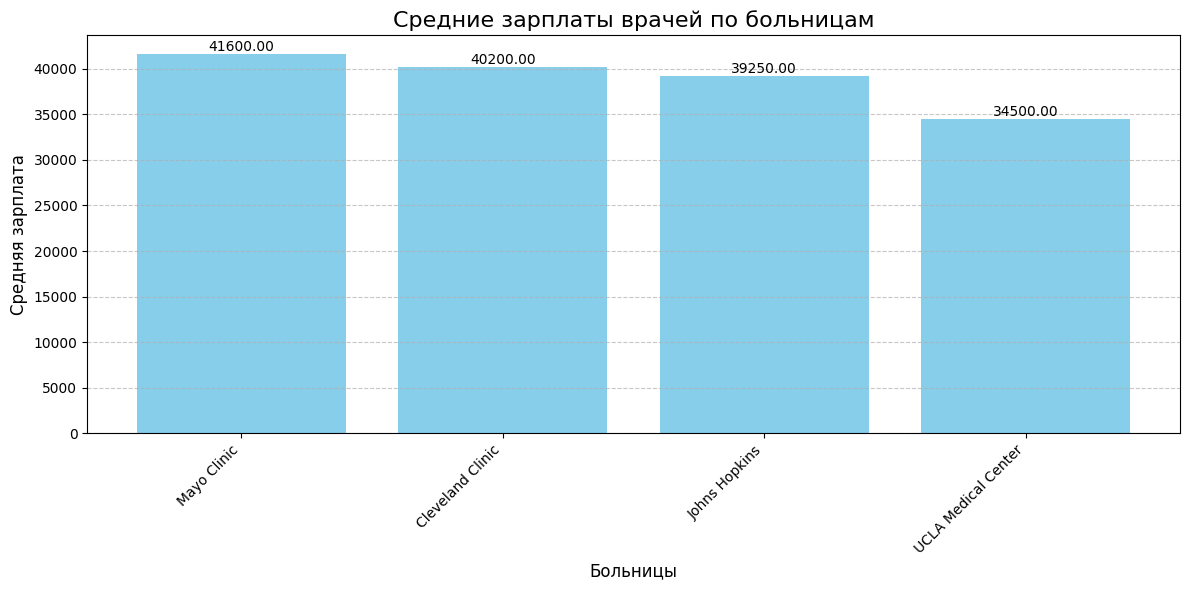

In [ ]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

def get_connection(database_name):
    """Функция для подключения к базе данных"""
    connection = psycopg2.connect(
        user="postgres",
        password="1",
        host="localhost",
        port="5432",
        database=database_name
    )
    return connection

def get_hospital_salary_data():
    """Получаем средние зарплаты по больницам"""
    try:
        connection = get_connection('medical_db')
        cursor = connection.cursor()
        
        # Запрос для получения средних зарплат по больницам
        query = """
        SELECT h.Hospital_Name, AVG(d.Salary) as Avg_Salary
        FROM Doctor d
        JOIN Hospital h ON d.Hospital_Id = h.Hospital_Id
        GROUP BY h.Hospital_Name
        ORDER BY Avg_Salary DESC
        """
        
        cursor.execute(query)
        data = cursor.fetchall()
        
        # Закрываем соединение
        cursor.close()
        connection.close()
        
        return data
        
    except (Exception, psycopg2.Error) as error:
        print("Ошибка при получении данных:", error)
        return None

def plot_hospital_salaries():
    """Строим столбчатую диаграмму зарплат по больницам"""
    data = get_hospital_salary_data()
    
    if not data:
        print("Нет данных для построения графика")
        return
    
    # Разделяем данные на названия больниц и зарплаты
    hospitals = [item[0] for item in data]
    salaries = [item[1] for item in data]
    
    # Создаем график
    plt.figure(figsize=(12, 6))
    bars = plt.bar(hospitals, salaries, color='skyblue')
    
    # Добавляем значения на столбцы
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    
    
    plt.title('Средние зарплаты врачей по больницам', fontsize=16)
    plt.xlabel('Больницы', fontsize=12)
    plt.ylabel('Средняя зарплата', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
  
    plt.show()

plot_hospital_salaries()